In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import os
%matplotlib inline
#plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit, train_test_split, learning_curve,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
rnd_state = 0

In [14]:
# create a database connection
sqluser = 'maxim'
dbname = 'maxim'
schema_name = 'mimiciii'

In [4]:
# Connect to local postgres version of mimic
connect = psycopg2.connect(dbname=dbname, user=sqluser)
cursor = connect.cursor()
cursor.execute('SET search_path to {}'.format(schema_name))

In [5]:
# Load in the query from file
query='SELECT * FROM OASIS'
oasis = pd.read_sql_query(query, connect)
#oasis = oasis.dropna(axis=0)
#oasis = oasis.loc[(oasis.urineoutput < 20000) & (oasis.urineoutput > 0) & 
#                  (oasis.temp > 30) & (oasis.temp < 45) & (oasis.icustay_age_group == 'adult')]
#oasis['preiculos_hours'] = oasis.preiculos.dt.total_seconds()/3600

Text(0, 0.5, 'Count')

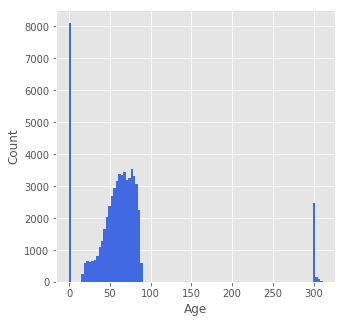

In [22]:
f, axs = plt.subplots(1,1,figsize=(5,5))

plt.hist(oasis.age,bins=103,color='royalblue')
plt.xlabel('Age')
plt.ylabel('Count')